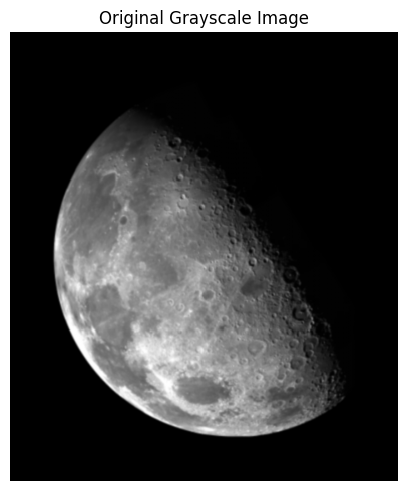

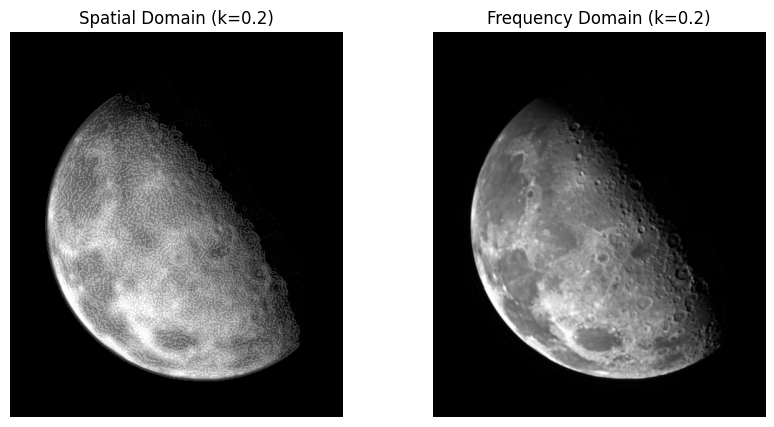

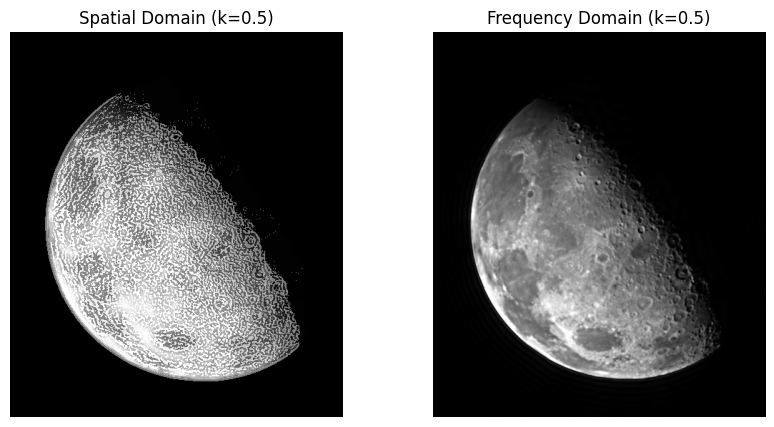

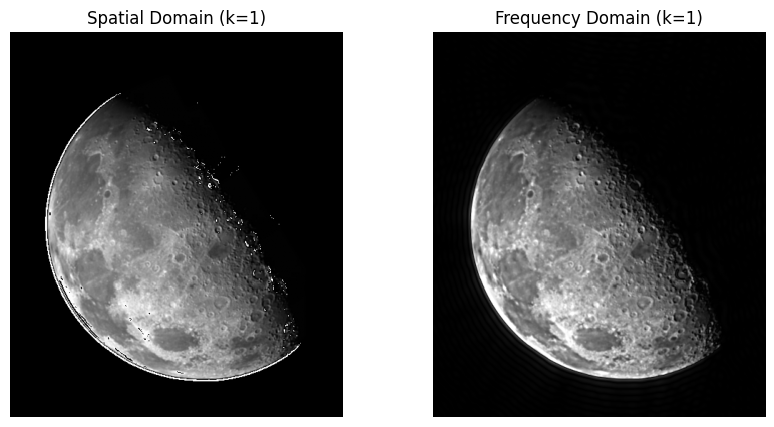

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "/content/moon.tif"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


plt.figure(figsize=(5,6))
plt.imshow(original_image, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()


k_values = [0.2, 0.5, 1]

# firstly I apply Unsharp Masking in Spatial Domain
def unsharp_mask_spatial(image, k):
    blurred = cv2.GaussianBlur(image, (5,5), 0)
    mask = image - blurred
    sharpened = np.clip(image + k * mask, 0, 255)
    return np.uint8(sharpened)

# thirdly I apply Unsharp Masking in Frequency Domain
def unsharp_mask_frequency(image, k, D0):
    f_transform = np.fft.fftshift(np.fft.fft2(image))

# I then generate High-Pass Filter
    rows, cols = image.shape
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    center_x, center_y = cols//2, rows//2
    distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
    H = 1 + k * (distance > D0)

    filtered_transform = H * f_transform
    recovered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_transform)))

    return np.uint8(np.clip(recovered_image, 0, 255))

for k in k_values:
    spatial_result = unsharp_mask_spatial(original_image, k)
    frequency_result = unsharp_mask_frequency(original_image, k, D0=30)

    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    axes[0].imshow(spatial_result, cmap="gray")
    axes[0].set_title(f"Spatial Domain (k={k})")
    axes[0].axis("off")

    axes[1].imshow(frequency_result, cmap="gray")
    axes[1].set_title(f"Frequency Domain (k={k})")
    axes[1].axis("off")

    plt.show()
